# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

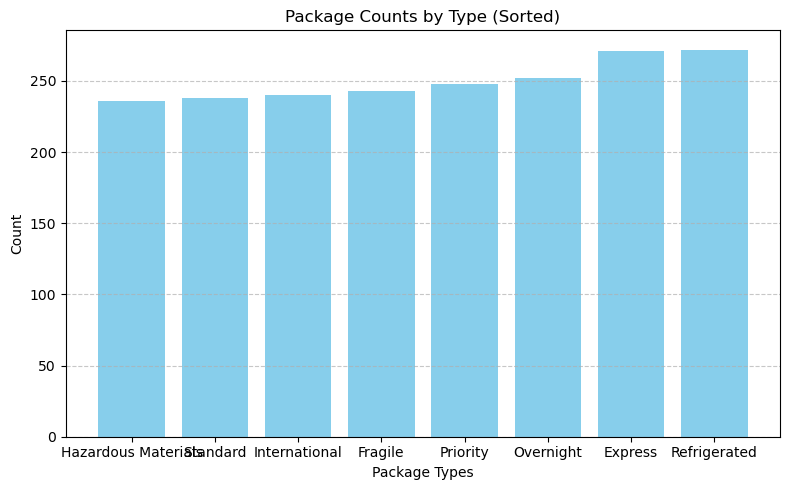

In [7]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Load JSON data
file_path = r"data\logistics_data.json"

with open(file_path, 'r') as file:
    data = json.load(file)

# Count package types
package_types = [item["package_type"] for item in data]
package_type_counts = Counter(package_types)

# Sort counts by value (ascending)
sorted_counts = dict(sorted(package_type_counts.items(), key=lambda x: x[1]))

# Plot
plt.figure(figsize=(8, 5))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.title('Package Counts by Type (Sorted)')
plt.xlabel('Package Types')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Package Type Distribution

**Insight:** Determine the frequency of each `package_type` (e.g., Express, Standard, etc.)  
**Chart:** 📊 Pie Chart  
**Useful for:** Understanding which type of package is most commonly shipped.


C:\Users\lrjab\AppData\Local\Temp\ipykernel_11944\3159924269.py:26: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lrjab\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


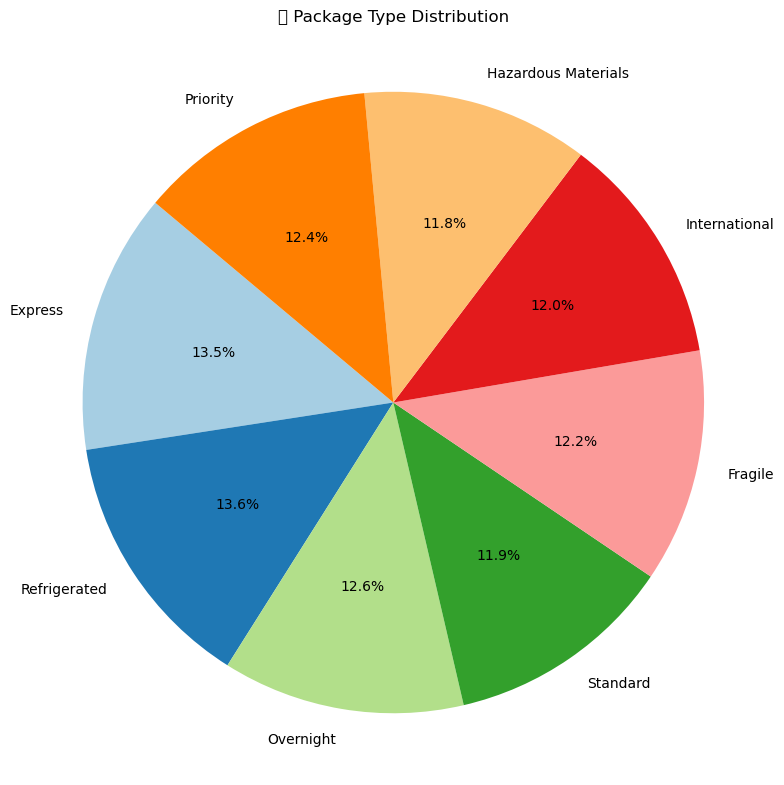

In [9]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Load JSON data
file_path = r"data\logistics_data.json"

with open(file_path, 'r') as file:
    data = json.load(file)

# Count package types (change "carrier" to "package_type")
package_types = [item["package_type"] for item in data if "package_type" in item]
package_type_counts = Counter(package_types)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    package_type_counts.values(),
    labels=package_type_counts.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('📦 Package Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()


# Carrier Usage Analysis

**Insight:** Insight: Count how many packages are handled by each `carrier` (e.g., FedEx, UPS, DHL)  
**Chart:** 📊 Bar Chart  
**Useful for:** Helps identify the most used logistics partner.


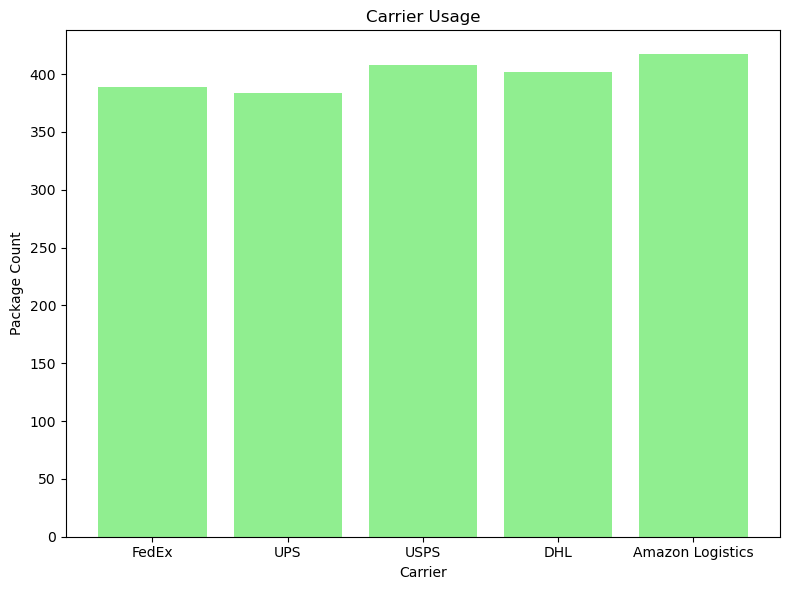

In [11]:
carriers = [item["carrier"] for item in data]
carrier_counts = Counter(carriers)

plt.figure(figsize=(8, 6))
plt.bar(carrier_counts.keys(), carrier_counts.values(), color='lightgreen')
plt.title('Carrier Usage')
plt.xlabel('Carrier')
plt.ylabel('Package Count')
plt.tight_layout()
plt.show()


# Package Volume vs. Weight

**Insight:** Compare each packages volume and weight to spot anomalies or correlations.  
**Chart:** 📊 Scatter Plot  
**Useful for:** Ideal for identifying oversized or heavy packages that may incur higher costs..

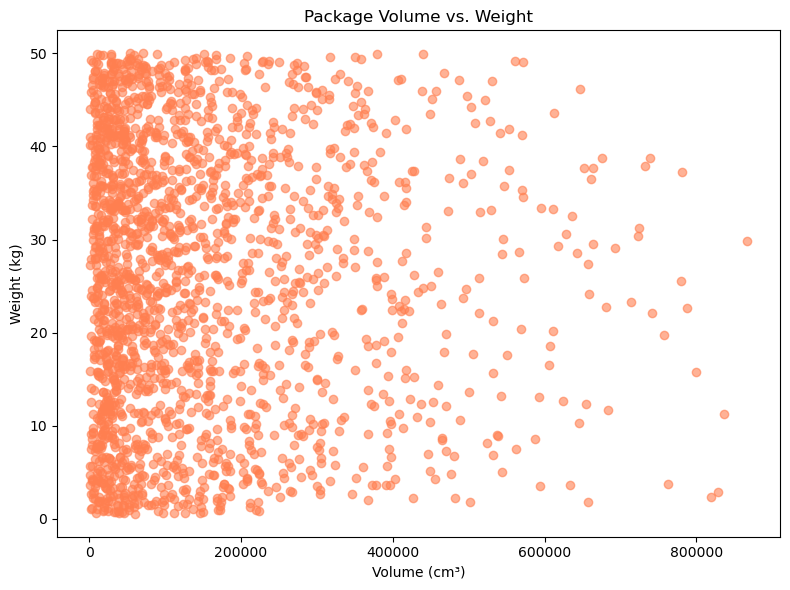

In [13]:
volumes = [item["dimensions"]["volume"] for item in data]
weights = [item["dimensions"]["weight"] for item in data]

plt.figure(figsize=(8, 6))
plt.scatter(volumes, weights, alpha=0.6, color='coral')
plt.title('Package Volume vs. Weight')
plt.xlabel('Volume (cm³)')
plt.ylabel('Weight (kg)')
plt.tight_layout()
plt.show()


# Package Journey Events per Package

**Insight:** Count how many tracking events each package has gone through (from tracking_history).  
**Chart:** Scatter Plot  
**Useful for:** Useful to evaluate transit complexity (e.g., how many hubs or delays occurred).

# Tracking Events per Package

##  What is a Tracking Event?

In logistics, a **tracking event** represents a status update about the package's journey from origin to destination. Each event includes:

- **Timestamp** – when the update happened
- **Status** – such as "In Transit", "Pending", or "Delivered"
- **Location** – where the event occurred
- **Scan Type** – what kind of scan or checkpoint this represents
- **Carrier Info** – which logistics company performed the operation

Each package can have multiple events that represent its full journey across facilities and states.

---

##  What Does the Chart Show?

This chart shows the **number of tracking events per package** in the dataset. It helps us understand:

- How complex the delivery journey was
- How many checkpoints or scans each package passed
- Patterns in shipment processing (e.g., most packages only have 2–3 events, but some have more)


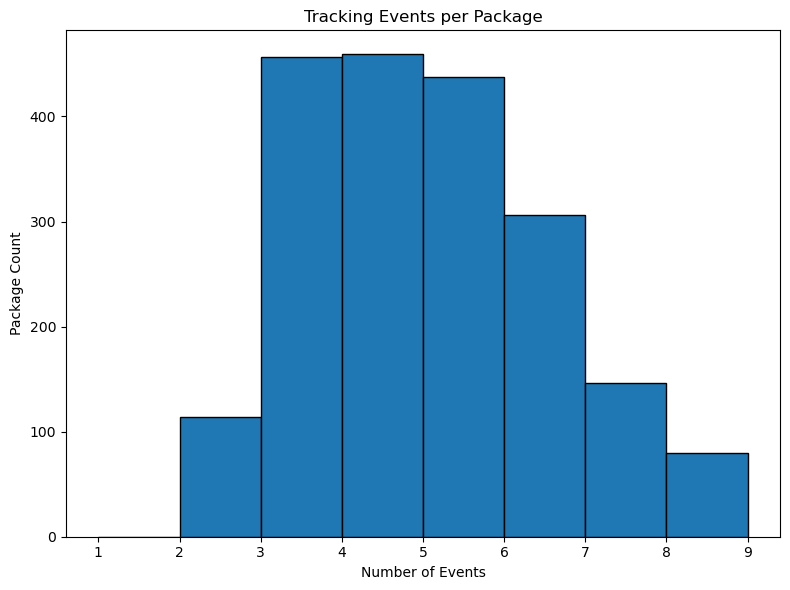

In [18]:
events_per_package = [len(item.get("tracking_history", [])) for item in data]

plt.figure(figsize=(8, 6))
plt.hist(events_per_package, bins=range(1, max(events_per_package)+2), edgecolor='black')
plt.title('Tracking Events per Package')
plt.xlabel('Number of Events')
plt.ylabel('Package Count')
plt.tight_layout()
plt.show()


# Origin vs. Destination States

**Insight:** Identify the most common origin and destination states.
  
**Chart:**  Grouped Bar Chart.

**Useful for:** Helps visualize shipment flows geographically.

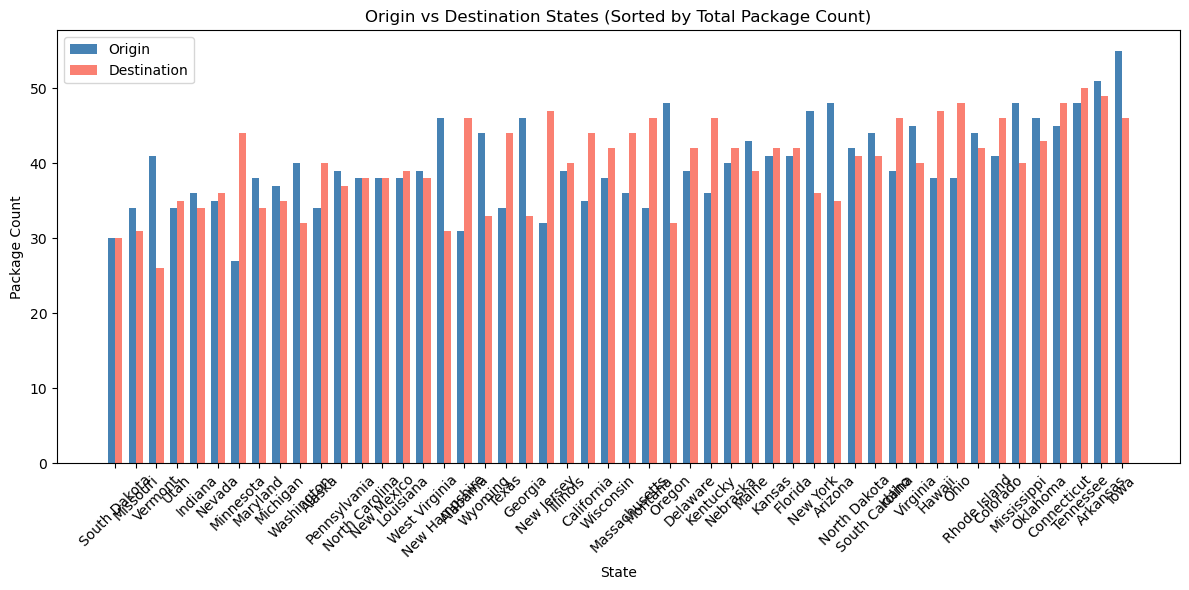

In [21]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Load JSON data
file_path = r"data\logistics_data.json"

with open(file_path, 'r') as file:
    data = json.load(file)

# Extract state information
origin_states = [item["origin"]["state"] for item in data]
destination_states = [item["destination"]["state"] for item in data]

# Count frequency
origin_counts = Counter(origin_states)
destination_counts = Counter(destination_states)

# Combine and sort states by total (origin + destination) count
all_states = list(set(origin_counts) | set(destination_counts))
all_states.sort(key=lambda state: origin_counts.get(state, 0) + destination_counts.get(state, 0))

# Get values in sorted order
origin_vals = [origin_counts.get(state, 0) for state in all_states]
dest_vals = [destination_counts.get(state, 0) for state in all_states]

# Plot
x = np.arange(len(all_states))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, origin_vals, width, label='Origin', color='steelblue')
plt.bar(x + width/2, dest_vals, width, label='Destination', color='salmon')
plt.xticks(x, all_states, rotation=45)
plt.title('Origin vs Destination States (Sorted by Total Package Count)')
plt.xlabel('State')
plt.ylabel('Package Count')
plt.legend()
plt.tight_layout()
plt.show()
